In [1]:
%pip install ppscore
%pip install hypertools

# to read CSV and for use with the library ppscore
import pandas as pd
from pandas.api.types import CategoricalDtype

# Plots
import matplotlib
from matplotlib import colors
from matplotlib import pyplot as plt
from matplotlib import colormaps as cm
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['figure.figsize'] = [10, 10]
mpl.rcParams.update({'font.size': 7})
import hypertools as hyp

# EDA
import numpy as np
import ppscore as pps
from scipy import stats


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# make a color map of fixed colors
color_iris_setosa = 'xkcd:baby purple'
color_iris_versicolor = 'xkcd:purplish blue'
color_iris_virginica = 'xkcd:periwinkle blue'
color_iris_setosa_hex = '#CA9BF7'
color_iris_versicolor_hex = '#601EF9'
color_iris_virginica_hex = '#8F99FB'
custom_cmap = colors.ListedColormap([color_iris_setosa, color_iris_versicolor, color_iris_virginica])
custom_cmap_bounds=[0,1,2]
custom_cmap_norm = colors.BoundaryNorm(custom_cmap_bounds, custom_cmap.N)

label_iris_setosa = 0
label_iris_versicolor = 1
label_iris_virginica = 2

In [3]:
# in this code block we define a function to read the dataset from a CSV file and perform some very basic preprocessing

def load_dataset(path: str, sep: str, target_column_name: str, columns_to_drop: list, column_name_mapping: dict, target_class_mapping: dict):

    target_column_is_index = False
    target_column_index = -1
    if(target_column_name.isnumeric()):
        target_column_is_index = True
        target_column_index = int(target_column_name)

    # read the CSV file
    # using separator character semicolon
    X_original_y_pd = pd.read_csv(path, sep=sep, skipinitialspace=True)

    # make column names pythonic
    # so that they can be used in code where applicable
    X_original_y_pd.columns = X_original_y_pd.columns.str.replace(" ", "_")

    for column_to_drop in columns_to_drop:
        X_original_y_pd.drop(column_to_drop, axis=1, inplace=True)

    X_original_y_pd.rename(column_name_mapping, axis=1, inplace=True)

    X_original_y_pd[target_column_name] = X_original_y_pd[target_column_name].map(target_class_mapping)

    # on a side note we choose to sort the data frame by the target column
    #X_original_y_pd.sort_values(by='species', ascending=True, axis=0, inplace=True)

    X_y_np = X_original_y_pd.to_numpy()

    # number of instances often referred to as just n
    n_samples = X_y_np.shape[0]
    print(f"n_samples={n_samples}")

    # number of target variables
    n_targets = 1
    print(f"n_targets={n_targets}")

    # number of target classes
    #n_target_classes = 3
    #print(f"n_target_classes={n_target_classes}")

    # number of features
    n_features = X_y_np.shape[1] - n_targets
    print(f"n_features={n_features}")

    assert X_y_np.shape == (n_samples, n_features + n_targets)
    assert X_y_np.shape == (n_samples, n_features + n_targets)

    X_original_pd = X_original_y_pd.copy().drop(target_column_name, axis=1)
    X_original_np = X_original_pd.to_numpy()
    assert X_original_np.shape == (n_samples,n_features)

    y_pd = X_original_y_pd[target_column_name].copy()
    y_np = y_pd.to_numpy()
    assert y_np.shape == (n_samples,)

    return (X_original_pd, y_pd, X_original_np, y_np, X_original_y_pd)


In [4]:
# in this code block we execute the above function to load the data

n_targets = 1
n_target_classes = 3

target_column_name = 'species | Spezies'

columns_to_drop = ['Id']

column_name_mapping = {'SepalLengthCm': 'sepal length | Länge Kelchblatt',
    'SepalWidthCm': 'sepal width | Breite Kelchblatt',
    'PetalLengthCm': 'petal length | Länge Blütenblatt',
    'PetalWidthCm': 'petal width | Breite Blütenblatt',
    'Species': 'species | Spezies'}

target_class_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
assert len(target_class_mapping) == n_target_classes

X_original_pd, y_pd, X_original_np, y_np, X_original_y_pd = load_dataset("sample_data/iris.csv",
    ',', target_column_name, columns_to_drop, column_name_mapping, target_class_mapping)


FileNotFoundError: [Errno 2] No such file or directory: 'sample_data/iris.csv'

# New Section

In [ ]:
# in this code block we define a function to perform an EDA

def explore_dataset(X_original_y_pd, X_y_np, n_target_classes, target_column_name, target_class_mapping):

    target_class_values = list(target_class_mapping.values())
    target_class_values = [float(i) for i in target_class_values]
    target_class_names = list(target_class_mapping.keys())

    print(f"target_class_values={target_class_values}")
    print(f"target_class_names={target_class_names}")
    print(f"target_class_mapping={target_class_mapping}")

    target_column_cat_name = f"{target_column_name}_cat"
    n_target_classes_range = range(n_target_classes)
    target_classes_int = [*n_target_classes_range]

    # number of instances
    print(f"n={X_y_np.shape[0]}")

    # location parameters
    print(f"mean={X_y_np.mean(axis=0)}")
    print(f"trimmed_mean={stats.trim_mean(X_y_np.astype('float32'), proportiontocut=0.10, axis=0)}")
    print(f"mode={stats.mode(X_y_np, keepdims=True)}")

    # statistical dispersion measures
    def range_np(a: np.ndarray) -> np.ndarray:
        result = a.max(axis=0) - a.min(axis=0)
        return result

    print(f"range={range_np(X_y_np)}")
    print(f"iqr={stats.iqr(X_y_np, axis=0)}")

    print(f"percentile_10={np.percentile(X_y_np, 10.0, axis=0)}")
    print(f"percentile_25={np.percentile(X_y_np, 25.0, axis=0)}")
    print(f"median={np.percentile(X_y_np, 50.0, axis=0)}")
    print(f"percentile_75={np.percentile(X_y_np, 75.0, axis=0)}")
    print(f"percentile_90={np.percentile(X_y_np, 90.0, axis=0)}")

    def mad_np(a: np.ndarray) -> np.ndarray:
        result = np.mean(np.absolute(a - np.mean(a, axis=0)), axis=0)
        return result

    print(f"mad={mad_np(X_y_np)}")

    print(f"std={X_y_np.std(axis=0)}")
    print(f"var={X_y_np.var(axis=0)}")

    # association measures
    print(f"\ncorrelation_matrix=\n{np.corrcoef(X_y_np, rowvar=False).round(decimals=2)}")

    # we have a look at a scatter matrix
    pd.plotting.scatter_matrix(X_original_y_pd,
                            c=X_original_y_pd[target_column_name],
                            figsize=(17, 17),
                            cmap = cm['cool'],
                            diagonal = 'kde')

    # for the computation of predictive power scores we use pandas categorical data type for class_cat
    class_categories_pd = CategoricalDtype(categories=target_classes_int, ordered=True)
    X_original_y_cat_pd = X_original_y_pd.copy()
    X_original_y_cat_pd[target_column_cat_name] = X_original_y_pd[target_column_name].astype(class_categories_pd)
    X_original_y_cat_pd.drop(target_column_name, axis=1, inplace=True)

    #predictive_power_score_matrix_all_pd = pps.matrix(df_pd_all, output='df')
    predictive_power_scores_pd = pps.predictors(X_original_y_cat_pd, y=target_column_cat_name, output='df')
    predictive_power_scores_pd.style.background_gradient(cmap='twilight', low=0.0, high=1.0)
    print(predictive_power_scores_pd)


In [ ]:
X_original_y_pd.max()

sepal length | Länge Kelchblatt     7.9
sepal width | Breite Kelchblatt     4.4
petal length | Länge Blütenblatt    6.9
petal width | Breite Blütenblatt    2.5
species | Spezies                   2.0
dtype: float64

     sepal length | Länge Kelchblatt  sepal width | Breite Kelchblatt  \
0                                5.1                              3.5   
1                                4.9                              3.0   
2                                4.7                              3.2   
3                                4.6                              3.1   
4                                5.0                              3.6   
..                               ...                              ...   
145                              6.7                              3.0   
146                              6.3                              2.5   
147                              6.5                              3.0   
148                              6.2                              3.4   
149                              5.9                              3.0   

     petal length | Länge Blütenblatt  petal width | Breite Blütenblatt  \
0                                 1.4           

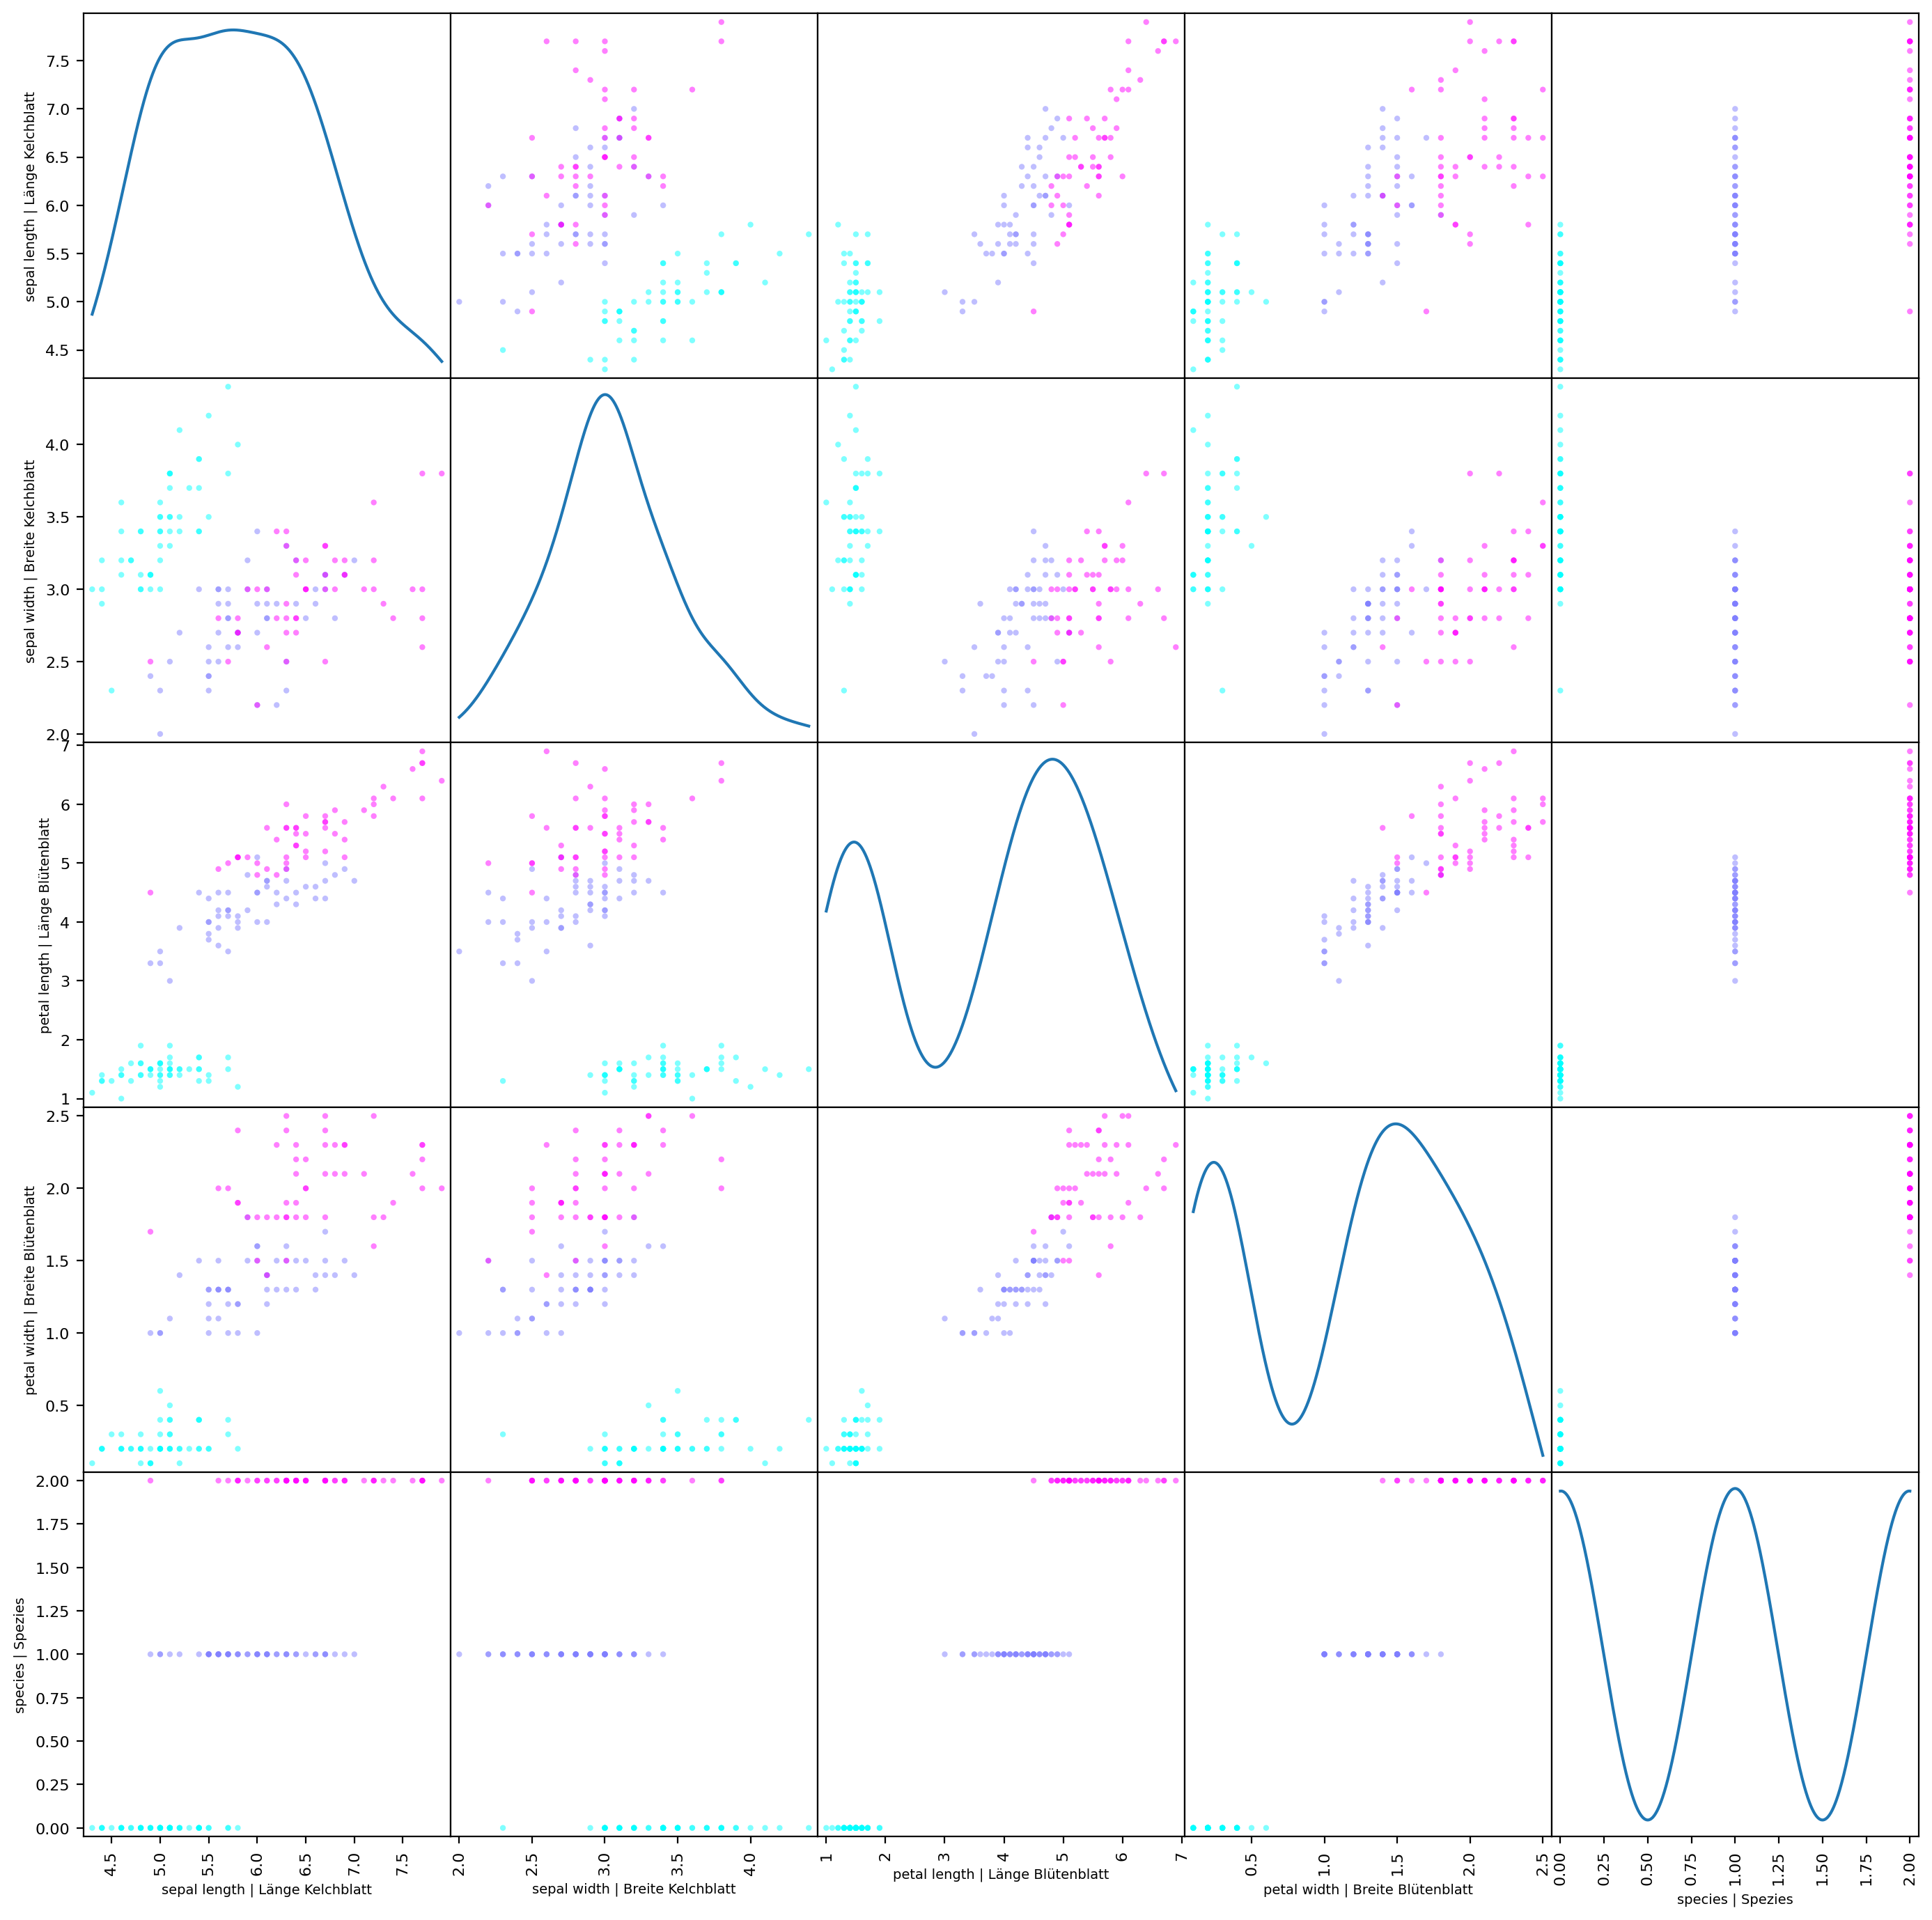

In [ ]:
# in this code block we explore the data set

print(X_original_y_pd)

explore_dataset(X_original_y_pd, X_original_y_pd.to_numpy(), n_target_classes, 'species | Spezies', target_class_mapping)


In [ ]:
X_sepal_length_cm_np = X_original_np[:,0]
print(f"X_sepal_length_cm_np.shape={X_sepal_length_cm_np.shape}")
print(f"X_sepal_length_cm_np.max={X_sepal_length_cm_np.max()}")
X_sepal_width_cm_np = X_original_np[:,1]
print(f"X_sepal_width_cm_np.shape={X_sepal_width_cm_np.shape}")
print(f"X_sepal_width_cm_np.max={X_sepal_width_cm_np.max()}")
X_petal_length_cm_np = X_original_np[:,2]
print(f"X_petal_length_cm_np.shape={X_petal_length_cm_np.shape}")
print(f"X_petal_length_cm_np.max={X_petal_length_cm_np.max()}")
X_petal_width_cm_np = X_original_np[:,3]
print(f"X_petal_width_cm_np.shape={X_petal_width_cm_np.shape}")
print(f"X_petal_width_cm_np.max={X_petal_width_cm_np.max()}")
print(f"y_np={y_np}")
print()
print(f"X_sepal_length_cm_np.shape={X_sepal_length_cm_np[y_np == label_iris_setosa].shape}")
print(f"X_sepal_length_cm_np.max={X_sepal_length_cm_np[y_np == label_iris_setosa].max()}")
print(f"X_sepal_width_cm_np.shape={X_sepal_width_cm_np[y_np == label_iris_setosa].shape}")
print(f"X_sepal_width_cm_np.max={X_sepal_width_cm_np[y_np == label_iris_setosa].max()}")
print(f"X_petal_length_cm_np.shape={X_petal_length_cm_np[y_np == label_iris_setosa].shape}")
print(f"X_petal_length_cm_np.max={X_petal_length_cm_np[y_np == label_iris_setosa].max()}")
print(f"X_petal_width_cm_np.shape={X_petal_width_cm_np[y_np == label_iris_setosa].shape}")
print(f"X_petal_width_cm_np.max={X_petal_width_cm_np[y_np == label_iris_setosa].max()}")
print()
print(f"X_sepal_length_cm_np.shape={X_sepal_length_cm_np[y_np == label_iris_versicolor].shape}")
print(f"X_sepal_length_cm_np.max={X_sepal_length_cm_np[y_np == label_iris_versicolor].max()}")
print(f"X_sepal_width_cm_np.shape={X_sepal_width_cm_np[y_np == label_iris_versicolor].shape}")
print(f"X_sepal_width_cm_np.max={X_sepal_width_cm_np[y_np == label_iris_versicolor].max()}")
print(f"X_petal_length_cm_np.shape={X_petal_length_cm_np[y_np == label_iris_versicolor].shape}")
print(f"X_petal_length_cm_np.max={X_petal_length_cm_np[y_np == label_iris_versicolor].max()}")
print(f"X_petal_width_cm_np.shape={X_petal_width_cm_np[y_np == label_iris_versicolor].shape}")
print(f"X_petal_width_cm_np.max={X_petal_width_cm_np[y_np == label_iris_versicolor].max()}")
print()
print(f"X_sepal_length_cm_np.shape={X_sepal_length_cm_np[y_np == label_iris_virginica].shape}")
print(f"X_sepal_length_cm_np.max={X_sepal_length_cm_np[y_np == label_iris_virginica].max()}")
print(f"X_sepal_width_cm_np.shape={X_sepal_width_cm_np[y_np == label_iris_virginica].shape}")
print(f"X_sepal_width_cm_np.max={X_sepal_width_cm_np[y_np == label_iris_virginica].max()}")
print(f"X_petal_length_cm_np.shape={X_petal_length_cm_np[y_np == label_iris_virginica].shape}")
print(f"X_petal_length_cm_np.max={X_petal_length_cm_np[y_np == label_iris_virginica].max()}")
print(f"X_petal_width_cm_np.shape={X_petal_width_cm_np[y_np == label_iris_virginica].shape}")
print(f"X_petal_width_cm_np.max={X_petal_width_cm_np[y_np == label_iris_virginica].max()}")

X_sepal_length_cm_np.shape=(150,)
X_sepal_length_cm_np.max=7.9
X_sepal_width_cm_np.shape=(150,)
X_sepal_width_cm_np.max=4.4
X_petal_length_cm_np.shape=(150,)
X_petal_length_cm_np.max=6.9
X_petal_width_cm_np.shape=(150,)
X_petal_width_cm_np.max=2.5
y_np=[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

X_sepal_length_cm_np.shape=(50,)
X_sepal_length_cm_np.max=5.8
X_sepal_width_cm_np.shape=(50,)
X_sepal_width_cm_np.max=4.4
X_petal_length_cm_np.shape=(50,)
X_petal_length_cm_np.max=1.9
X_petal_width_cm_np.shape=(50,)
X_petal_width_cm_np.max=0.6

X_sepal_length_cm_np.shape=(50,)
X_sepal_length_cm_np.max=7.0
X_sepal_width_cm_np.shape=(50,)
X_sepal_width_cm_np.max=3.4
X_petal_length_cm_np.shape=(50,)
X_petal_length_cm_np.max=5.1
X_petal_wid

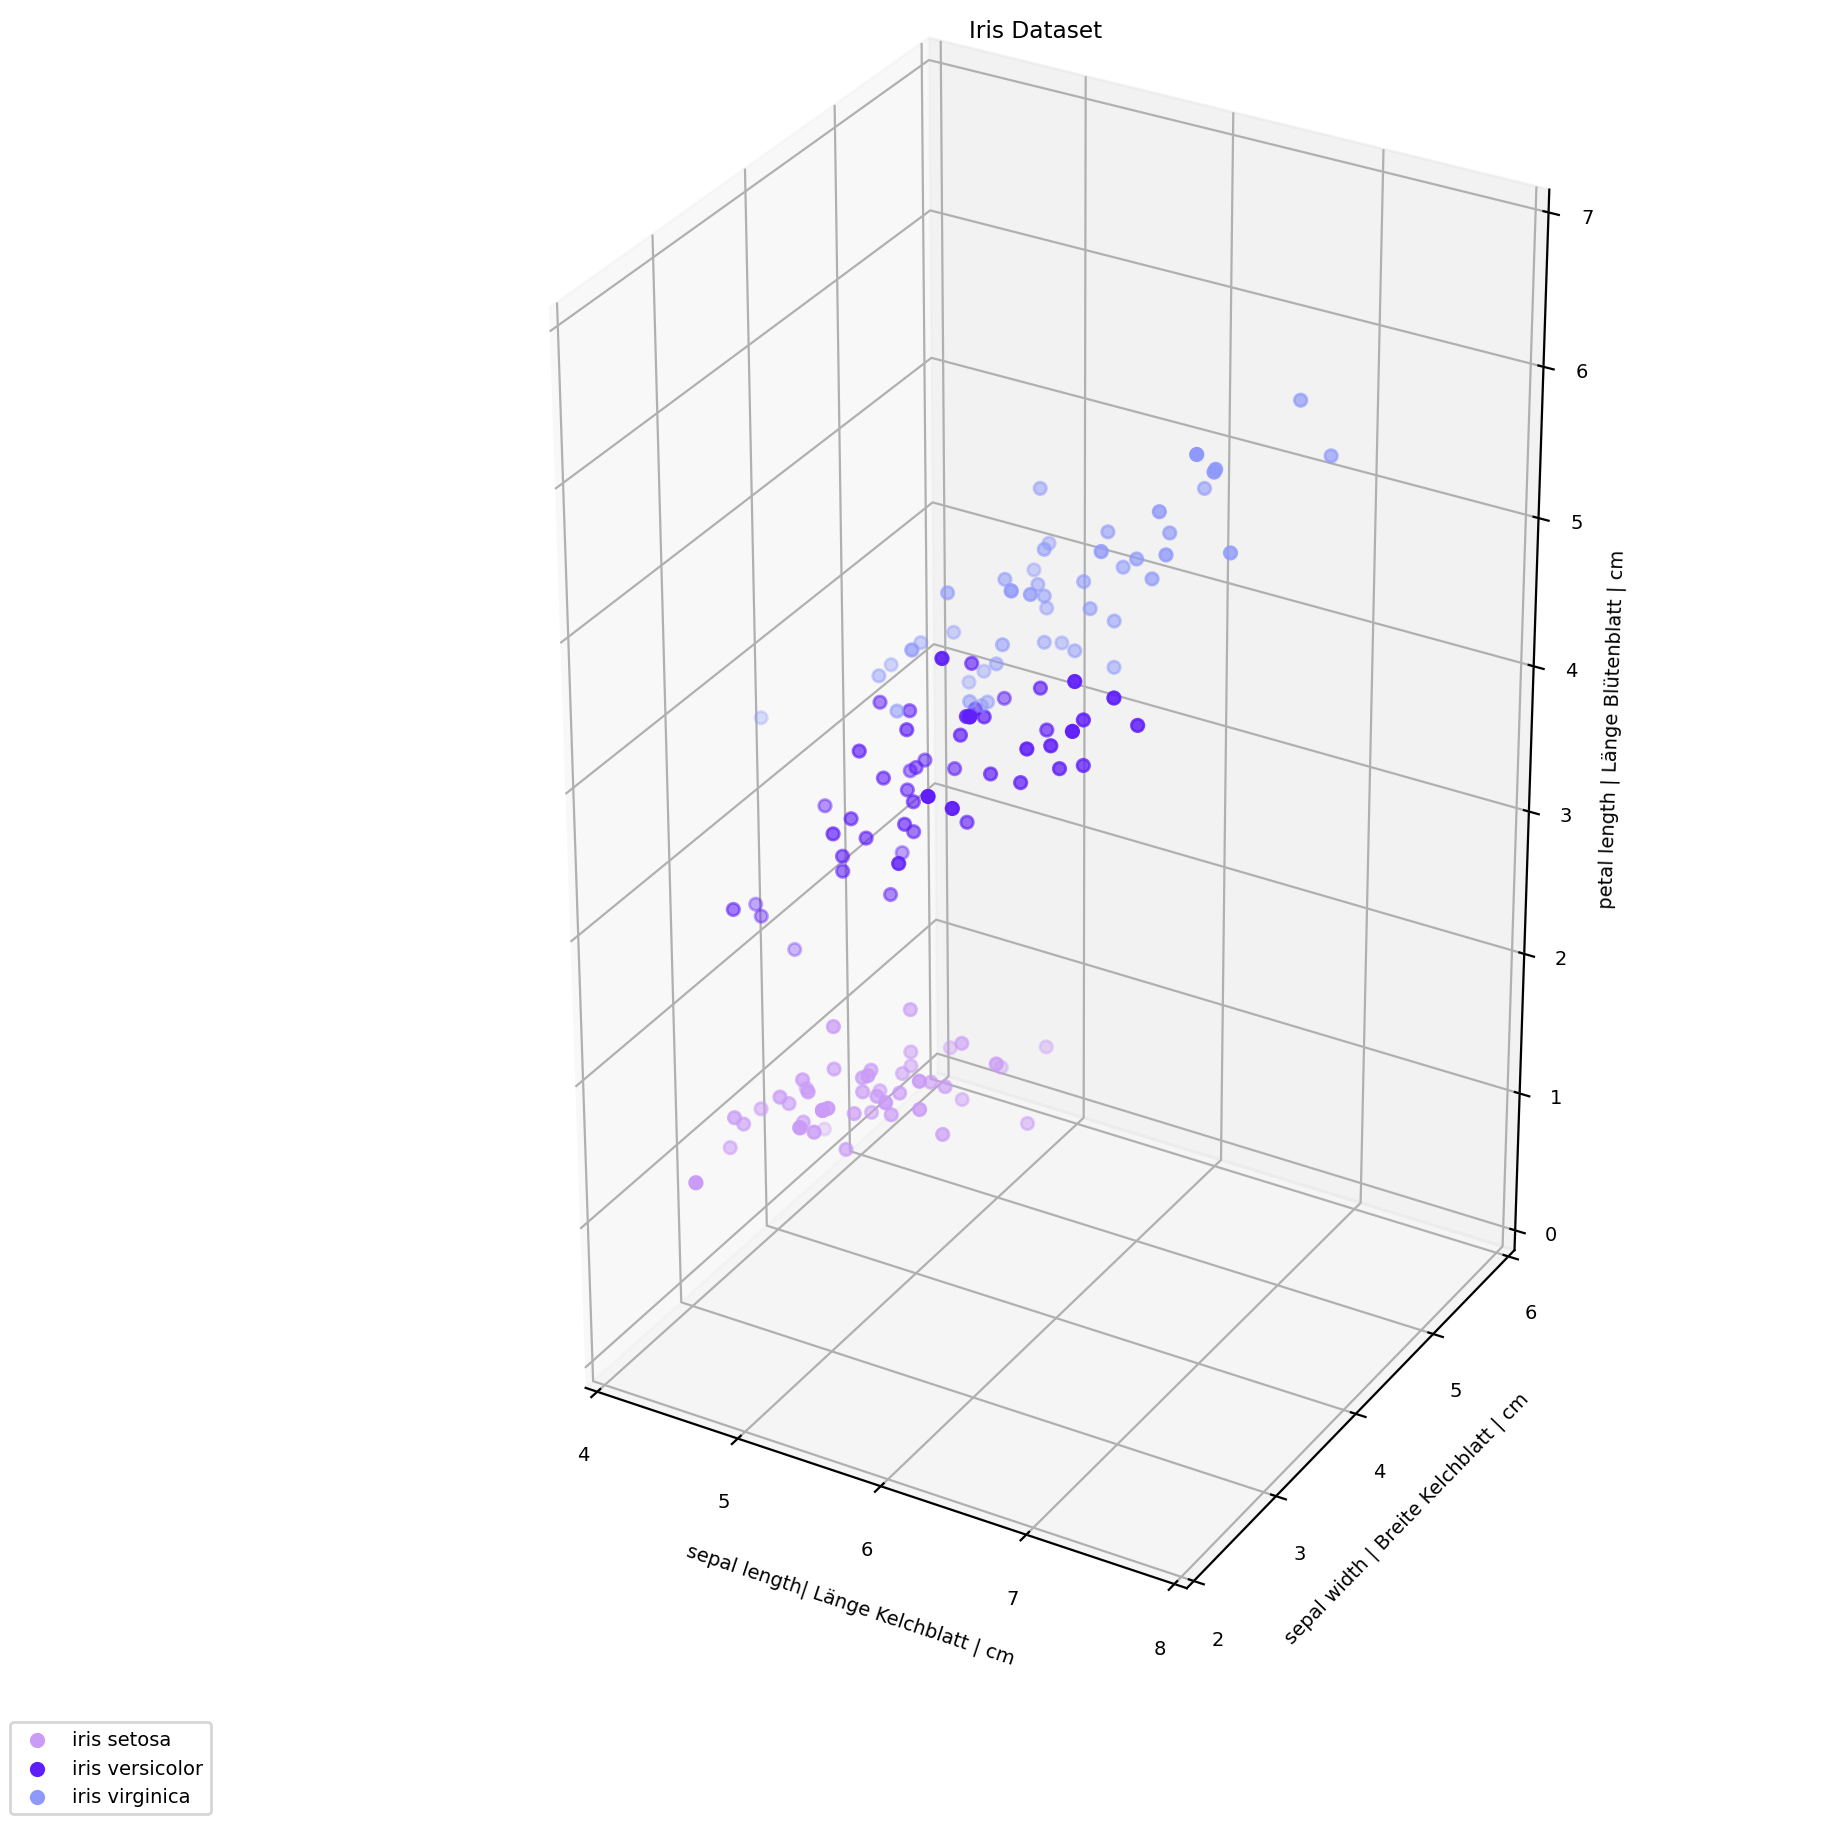

In [ ]:
# 4D dataset visualized in 3D space projected into a 2D image

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.zaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlim(4.0, 8.0)
ax.set_ylim(2.0, 6.0)
ax.set_zlim(0.0, 7.0)

img = ax.scatter(X_sepal_length_cm_np[y_np == label_iris_setosa], X_sepal_width_cm_np[y_np == label_iris_setosa], X_petal_length_cm_np[y_np == label_iris_setosa],
                 color=color_iris_setosa, label='iris setosa')
img = ax.scatter(X_sepal_length_cm_np[y_np == label_iris_versicolor], X_sepal_width_cm_np[y_np == label_iris_versicolor], X_petal_length_cm_np[y_np == label_iris_versicolor],
                 color=color_iris_versicolor, label='iris versicolor')
img = ax.scatter(X_sepal_length_cm_np[y_np == label_iris_virginica], X_sepal_width_cm_np[y_np == label_iris_virginica], X_petal_length_cm_np[y_np == label_iris_virginica],
                 color=color_iris_virginica, label='iris virginica')

#fig.colorbar(img)
plt.gca().set_aspect('equal')
ax.set_xlabel('sepal length| Länge Kelchblatt | cm')
ax.set_ylabel('sepal width | Breite Kelchblatt | cm')
ax.set_zlabel('petal length | Länge Blütenblatt | cm')
plt.title('Iris Dataset')
fig.legend(loc="lower left")
#plt.legend()
plt.show()


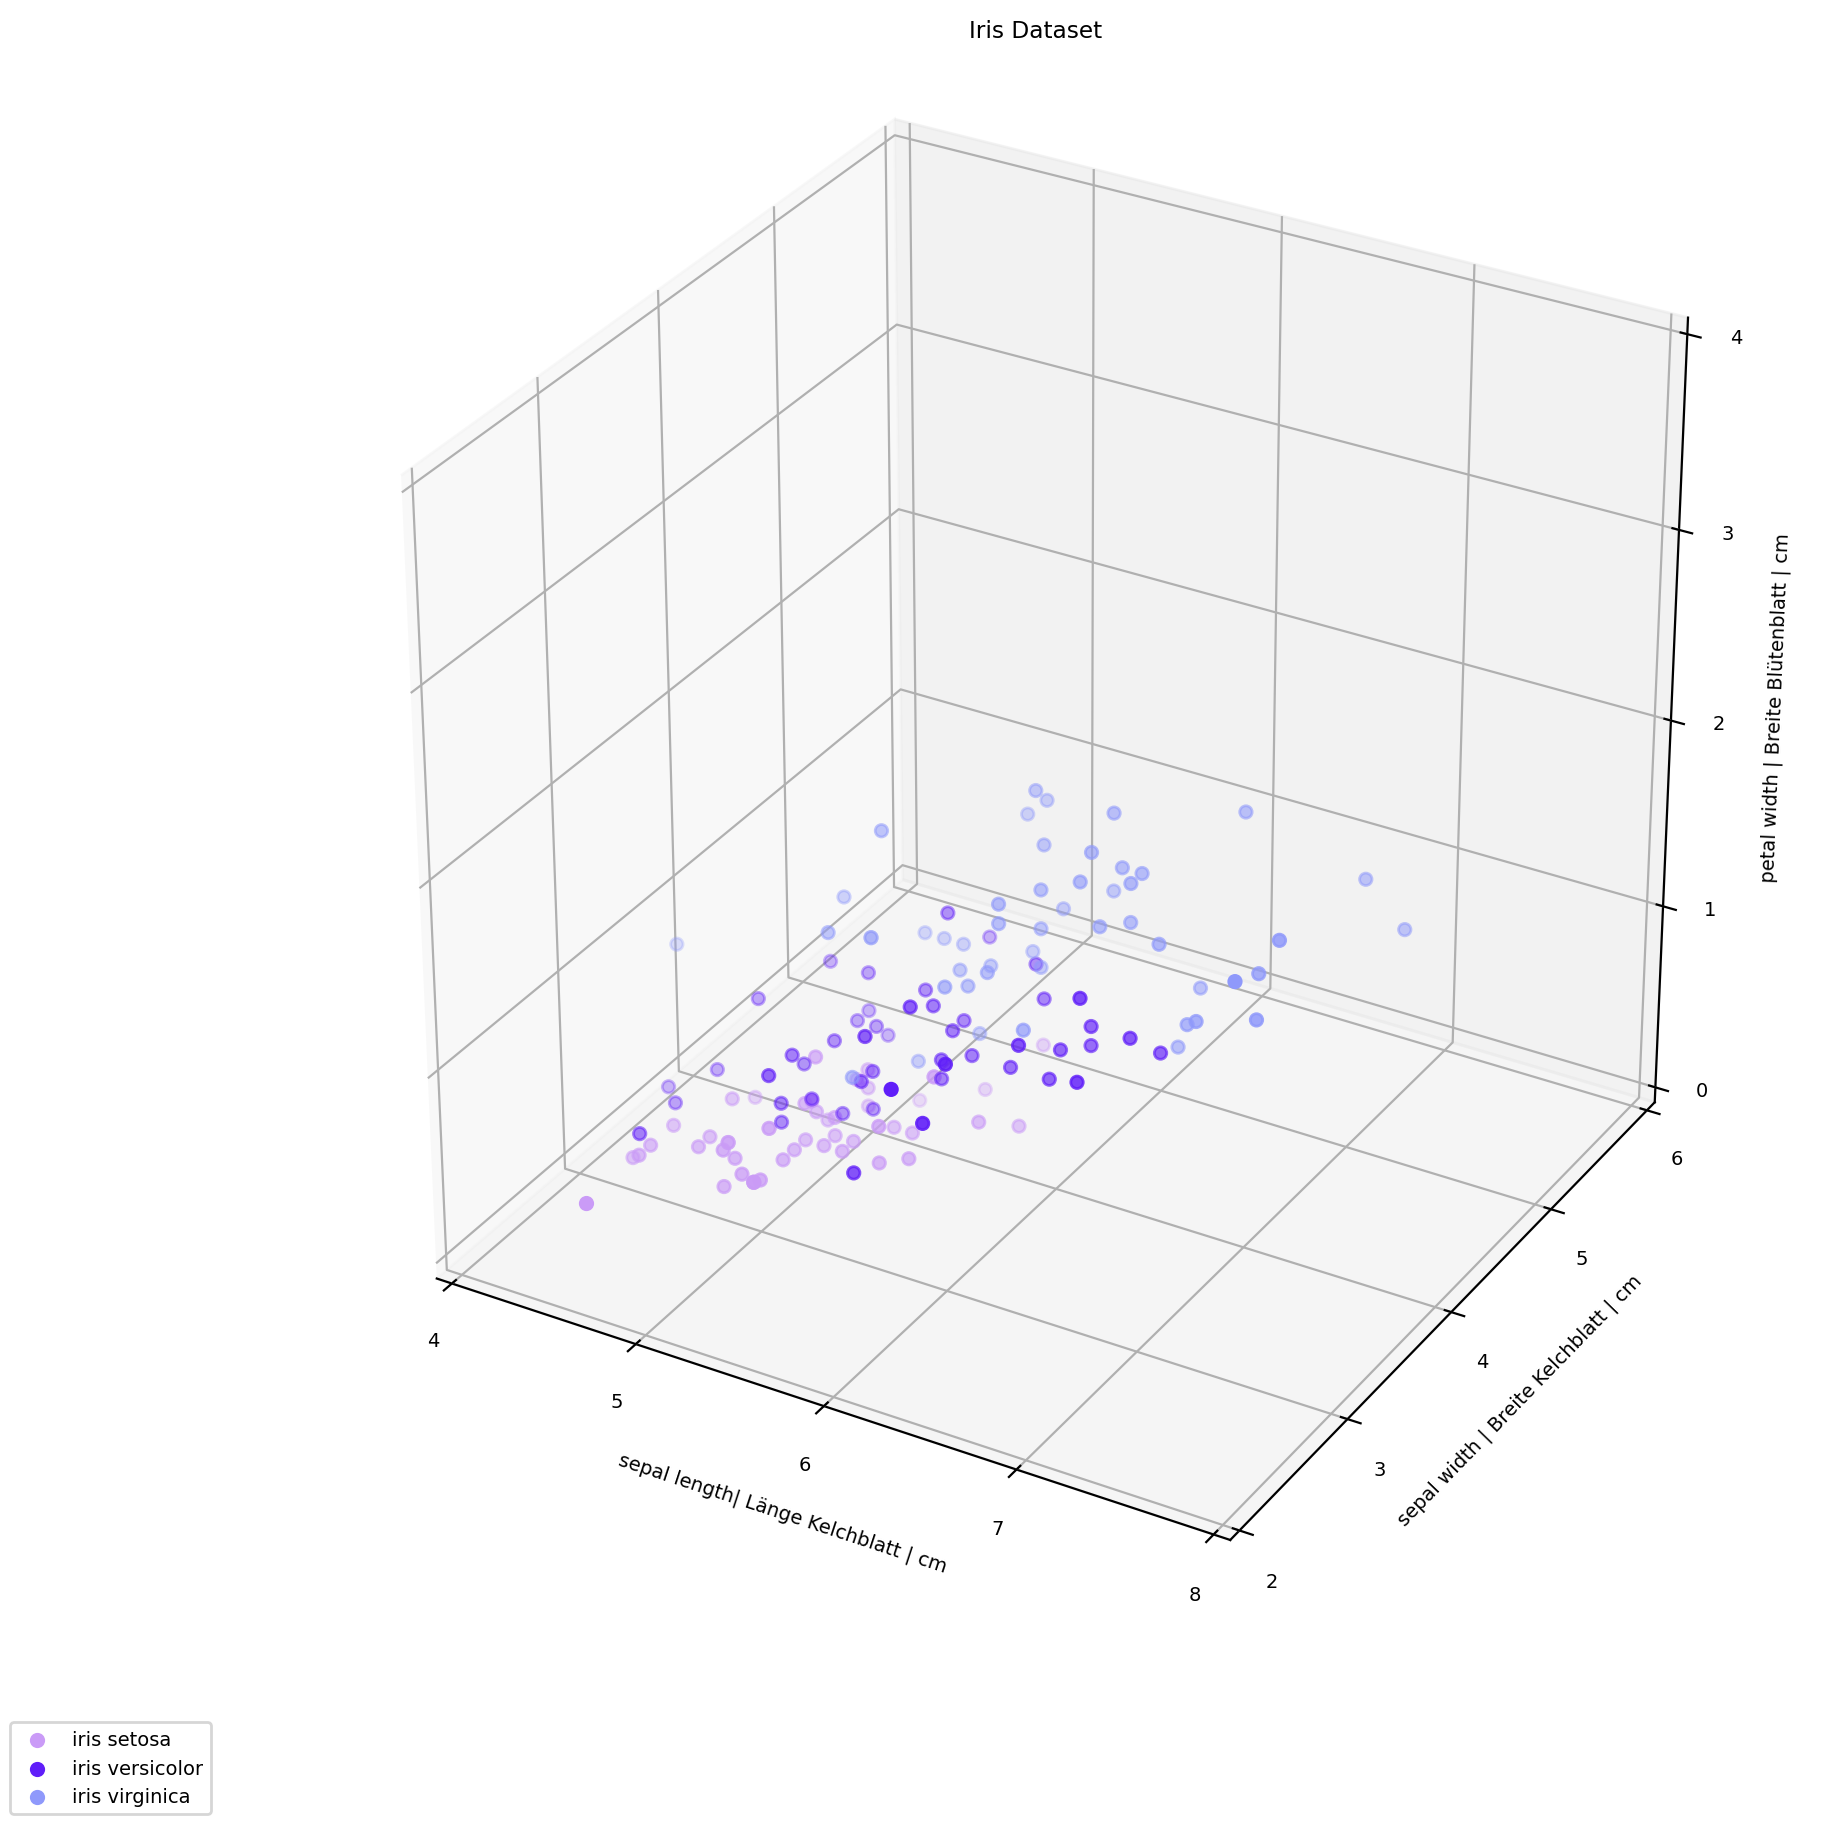

In [ ]:
# 4D dataset visualized in 3D space projected into a 2D image

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.zaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlim(4.0, 8.0)
ax.set_ylim(2.0, 6.0)
ax.set_zlim(0.0, 4.0)

img = ax.scatter(X_sepal_length_cm_np[y_np == label_iris_setosa], X_sepal_width_cm_np[y_np == label_iris_setosa], X_petal_width_cm_np[y_np == label_iris_setosa],
                 color=color_iris_setosa, label='iris setosa')
img = ax.scatter(X_sepal_length_cm_np[y_np == label_iris_versicolor], X_sepal_width_cm_np[y_np == label_iris_versicolor], X_petal_width_cm_np[y_np == label_iris_versicolor],
                 color=color_iris_versicolor, label='iris versicolor')
img = ax.scatter(X_sepal_length_cm_np[y_np == label_iris_virginica], X_sepal_width_cm_np[y_np == label_iris_virginica], X_petal_width_cm_np[y_np == label_iris_virginica],
                 color=color_iris_virginica, label='iris virginica')

#fig.colorbar(img)
plt.gca().set_aspect('equal')
ax.set_xlabel('sepal length| Länge Kelchblatt | cm')
ax.set_ylabel('sepal width | Breite Kelchblatt | cm')
ax.set_zlabel('petal width | Breite Blütenblatt | cm')
plt.title('Iris Dataset')
fig.legend(loc="lower left")
#plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/hypertools/plot/plot.py:284: UserWarning: Both color and colors defined: color will be ignored                           in favor of colors.
  warnings.warn('Both color and colors defined: color will be ignored \
/usr/local/lib/python3.10/dist-packages/hypertools/plot/plot.py:508: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  kwargs[kwarg]=np.array(kwargs[kwarg])


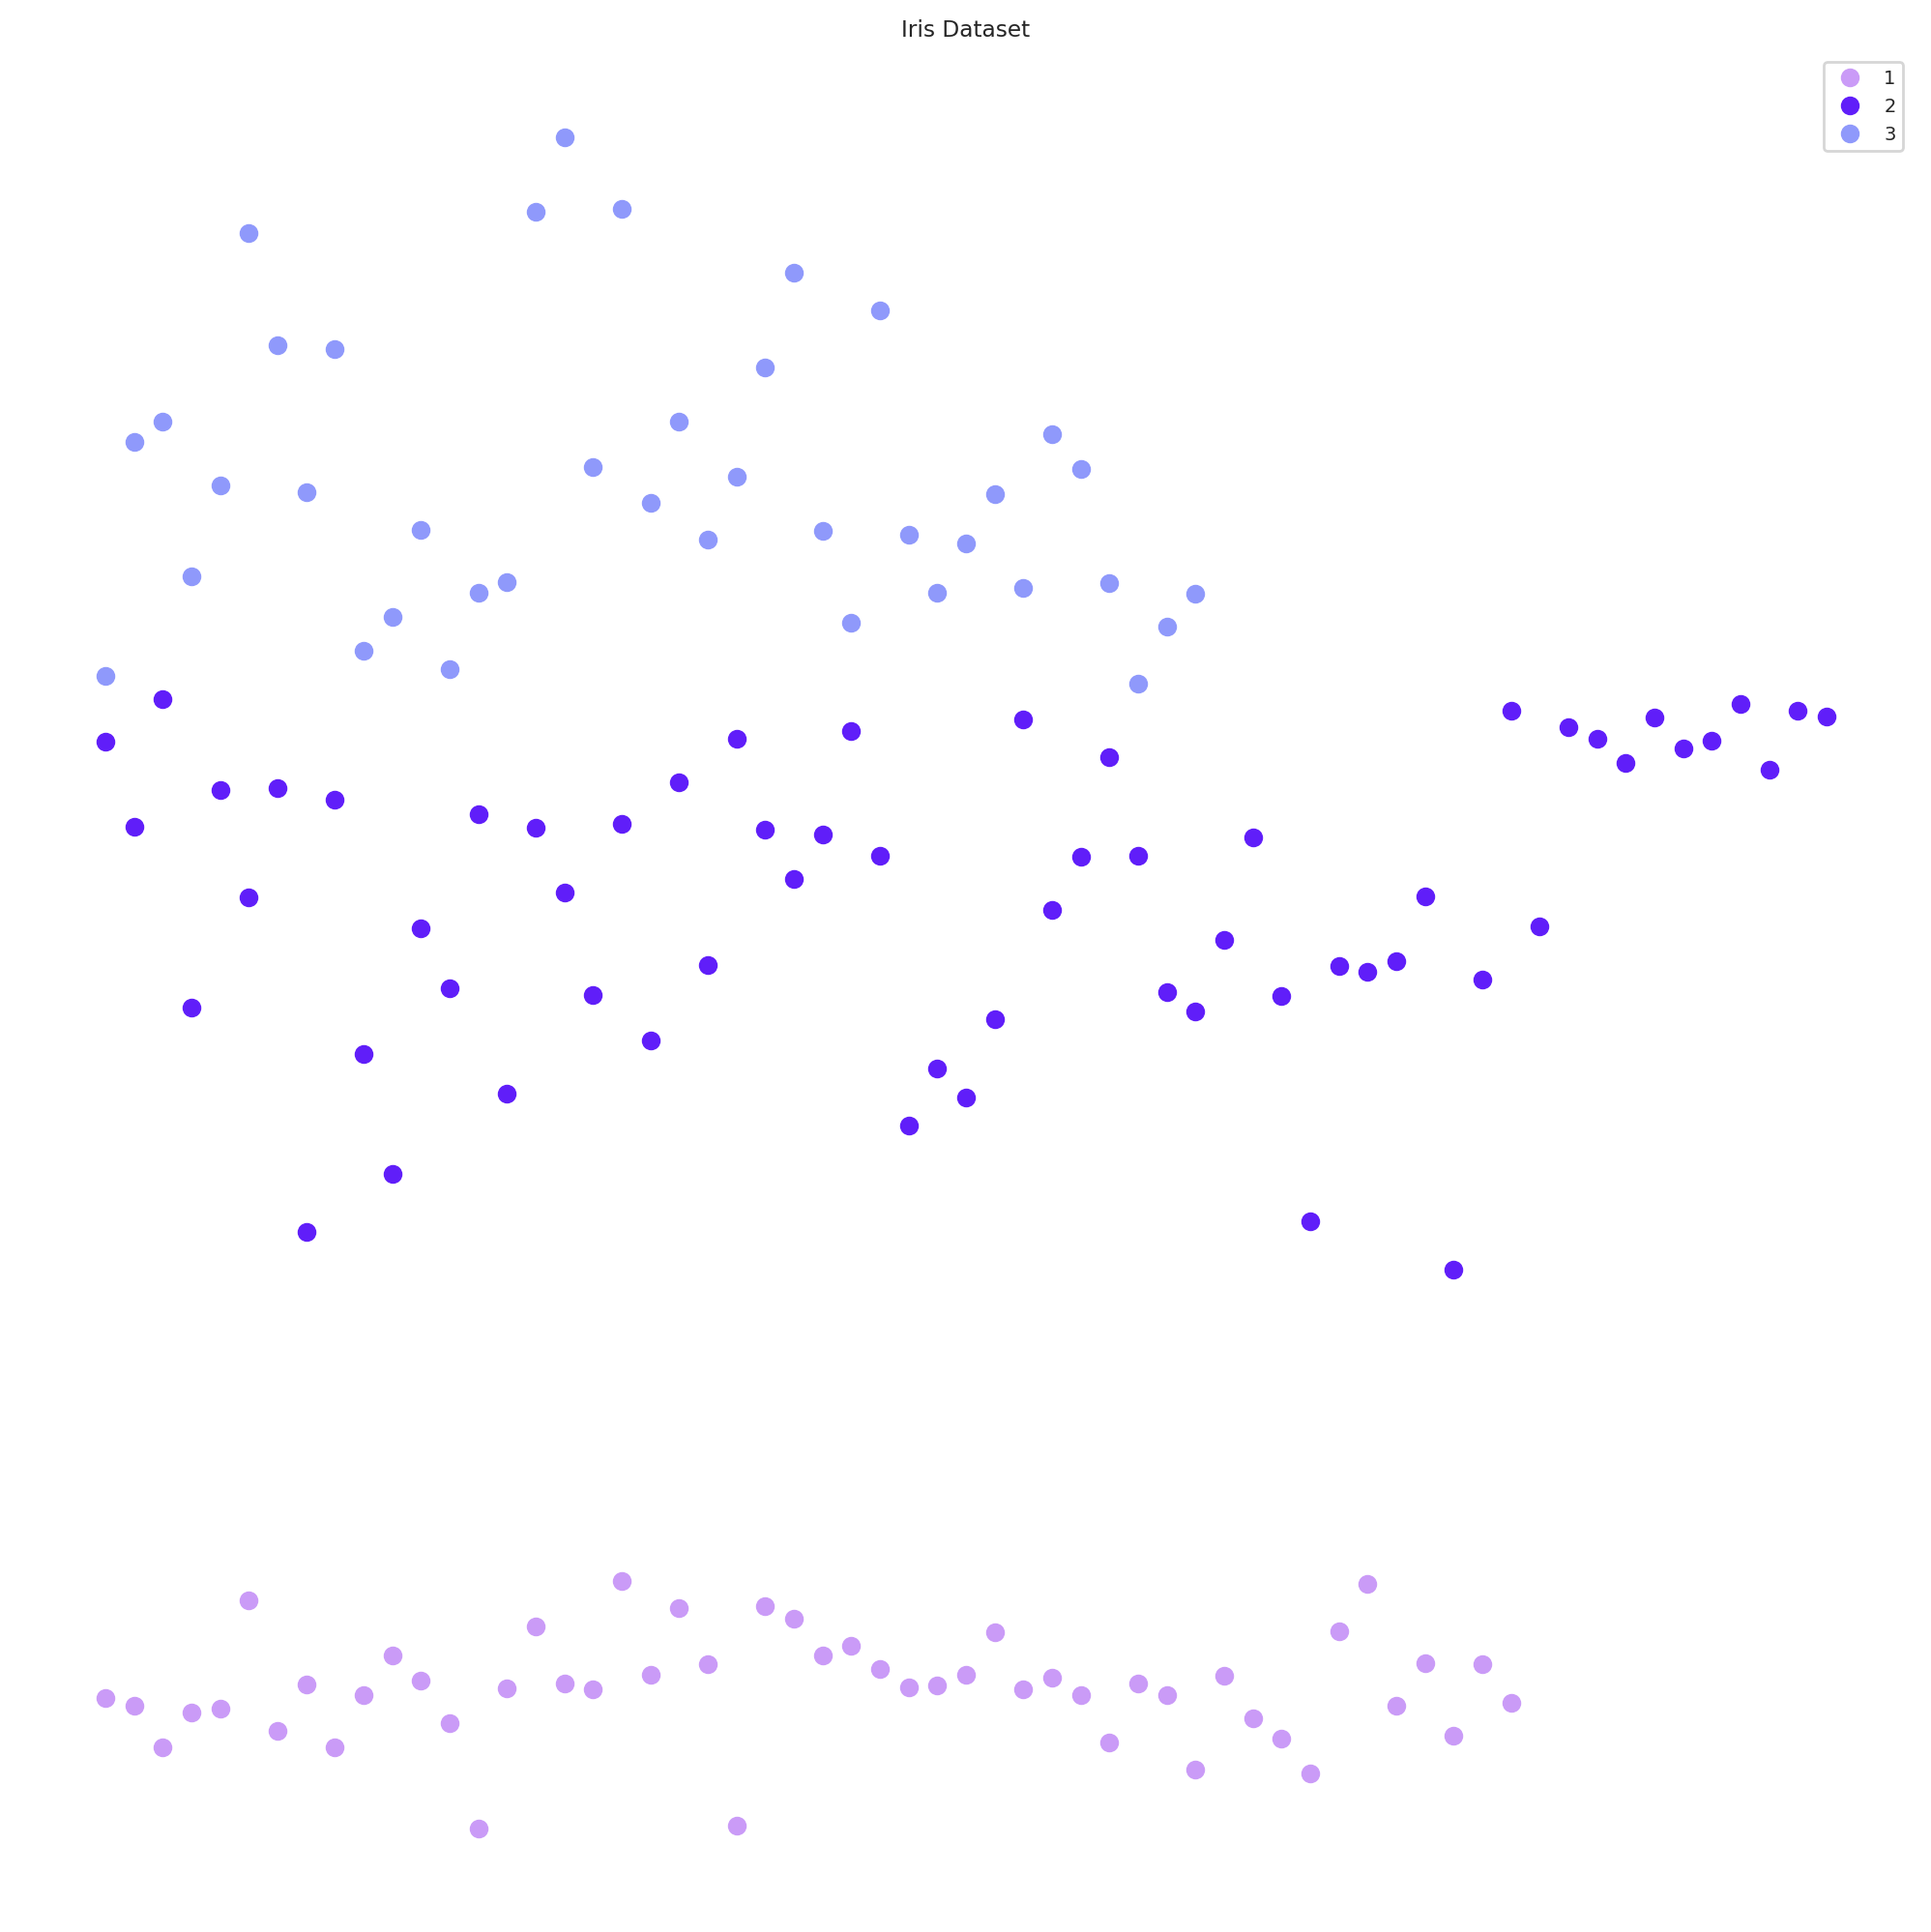

In [ ]:
hyp.plot(title='Iris Dataset',
         x=[X_original_np],
         fmt='o',
         color=[color_iris_setosa_hex, color_iris_versicolor_hex, color_iris_virginica_hex],
         colors=[color_iris_setosa_hex, color_iris_versicolor_hex, color_iris_virginica_hex],
         labels=y_np,
         legend=True,
         n_clusters=3,
         ndims=1,
         align=None)

/usr/local/lib/python3.10/dist-packages/hypertools/plot/plot.py:284: UserWarning: Both color and colors defined: color will be ignored                           in favor of colors.
  warnings.warn('Both color and colors defined: color will be ignored \
/usr/local/lib/python3.10/dist-packages/hypertools/plot/plot.py:508: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  kwargs[kwarg]=np.array(kwargs[kwarg])


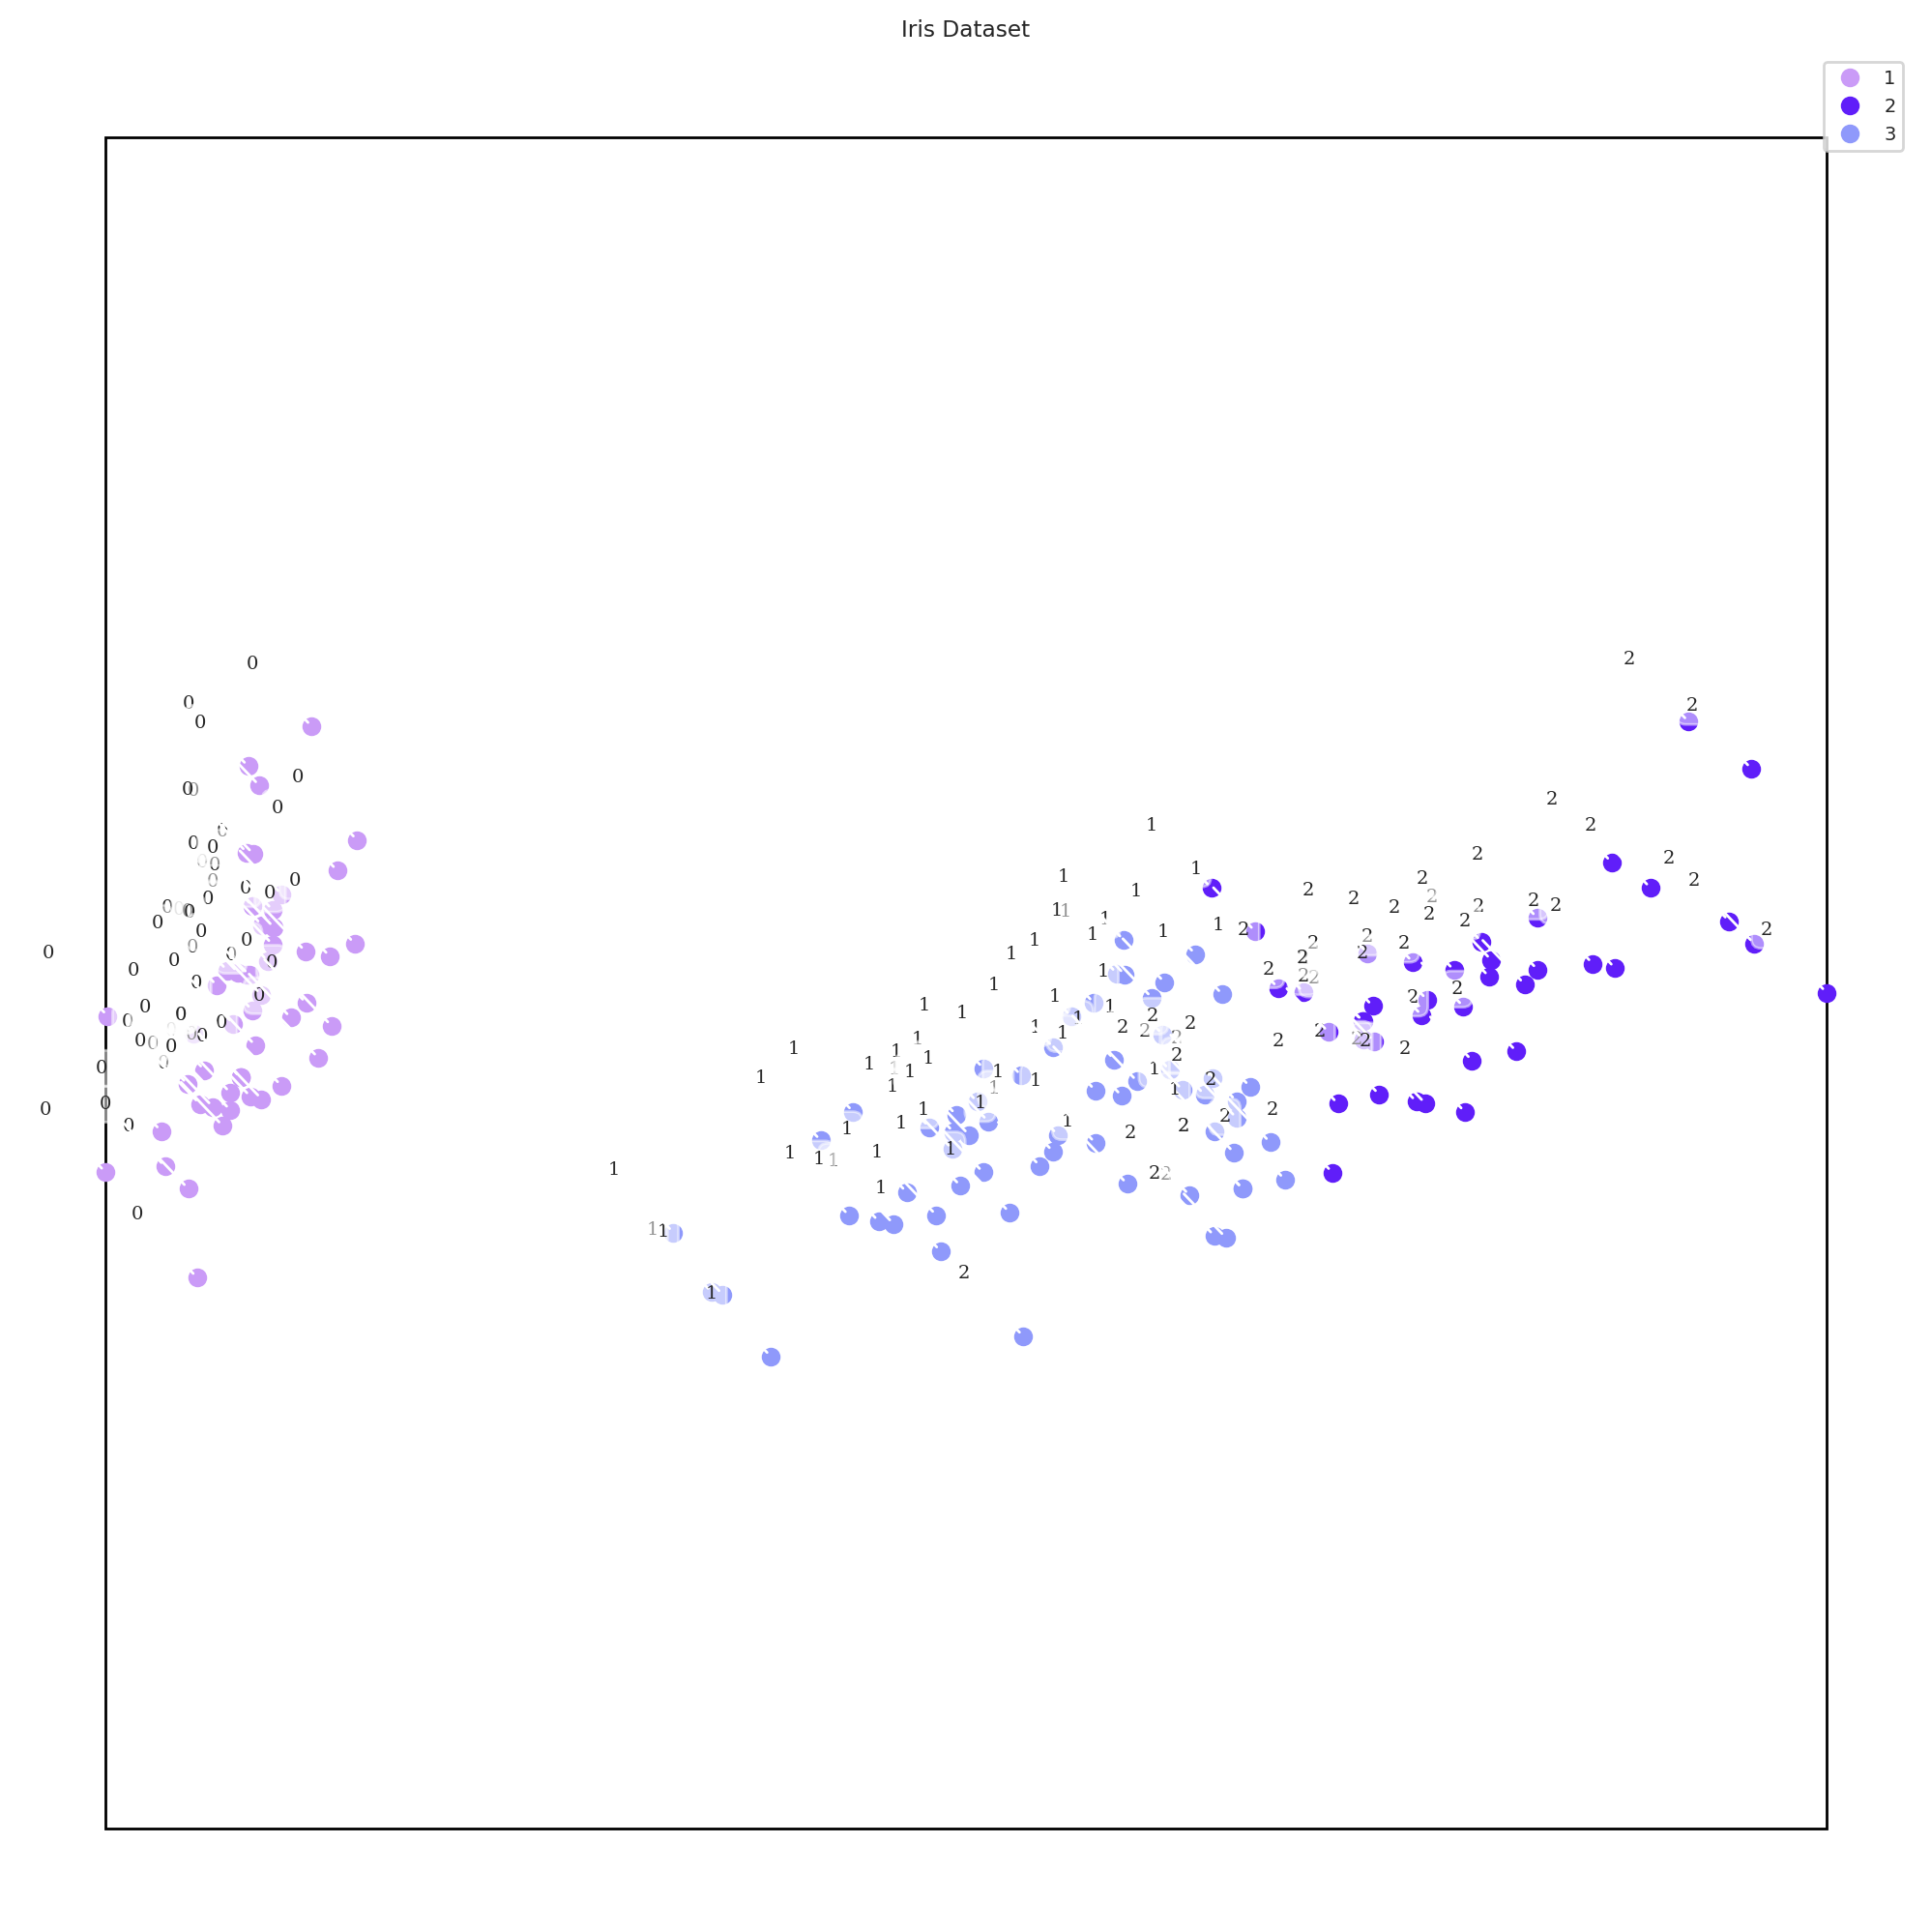

In [ ]:
hyp.plot(title='Iris Dataset',
         x=[X_original_np[y_np == label_iris_setosa],
            X_original_np[y_np == label_iris_versicolor],
            X_original_np[y_np == label_iris_virginica]],
         fmt='o',
         color=[color_iris_setosa_hex, color_iris_versicolor_hex, color_iris_virginica_hex],
         colors=[color_iris_setosa_hex, color_iris_versicolor_hex, color_iris_virginica_hex],
         labels=y_np,
         legend=True,
         n_clusters=3,
         ndims=2,
         align=None)

/usr/local/lib/python3.10/dist-packages/hypertools/plot/plot.py:284: UserWarning: Both color and colors defined: color will be ignored                           in favor of colors.
  warnings.warn('Both color and colors defined: color will be ignored \
/usr/local/lib/python3.10/dist-packages/hypertools/plot/plot.py:508: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  kwargs[kwarg]=np.array(kwargs[kwarg])


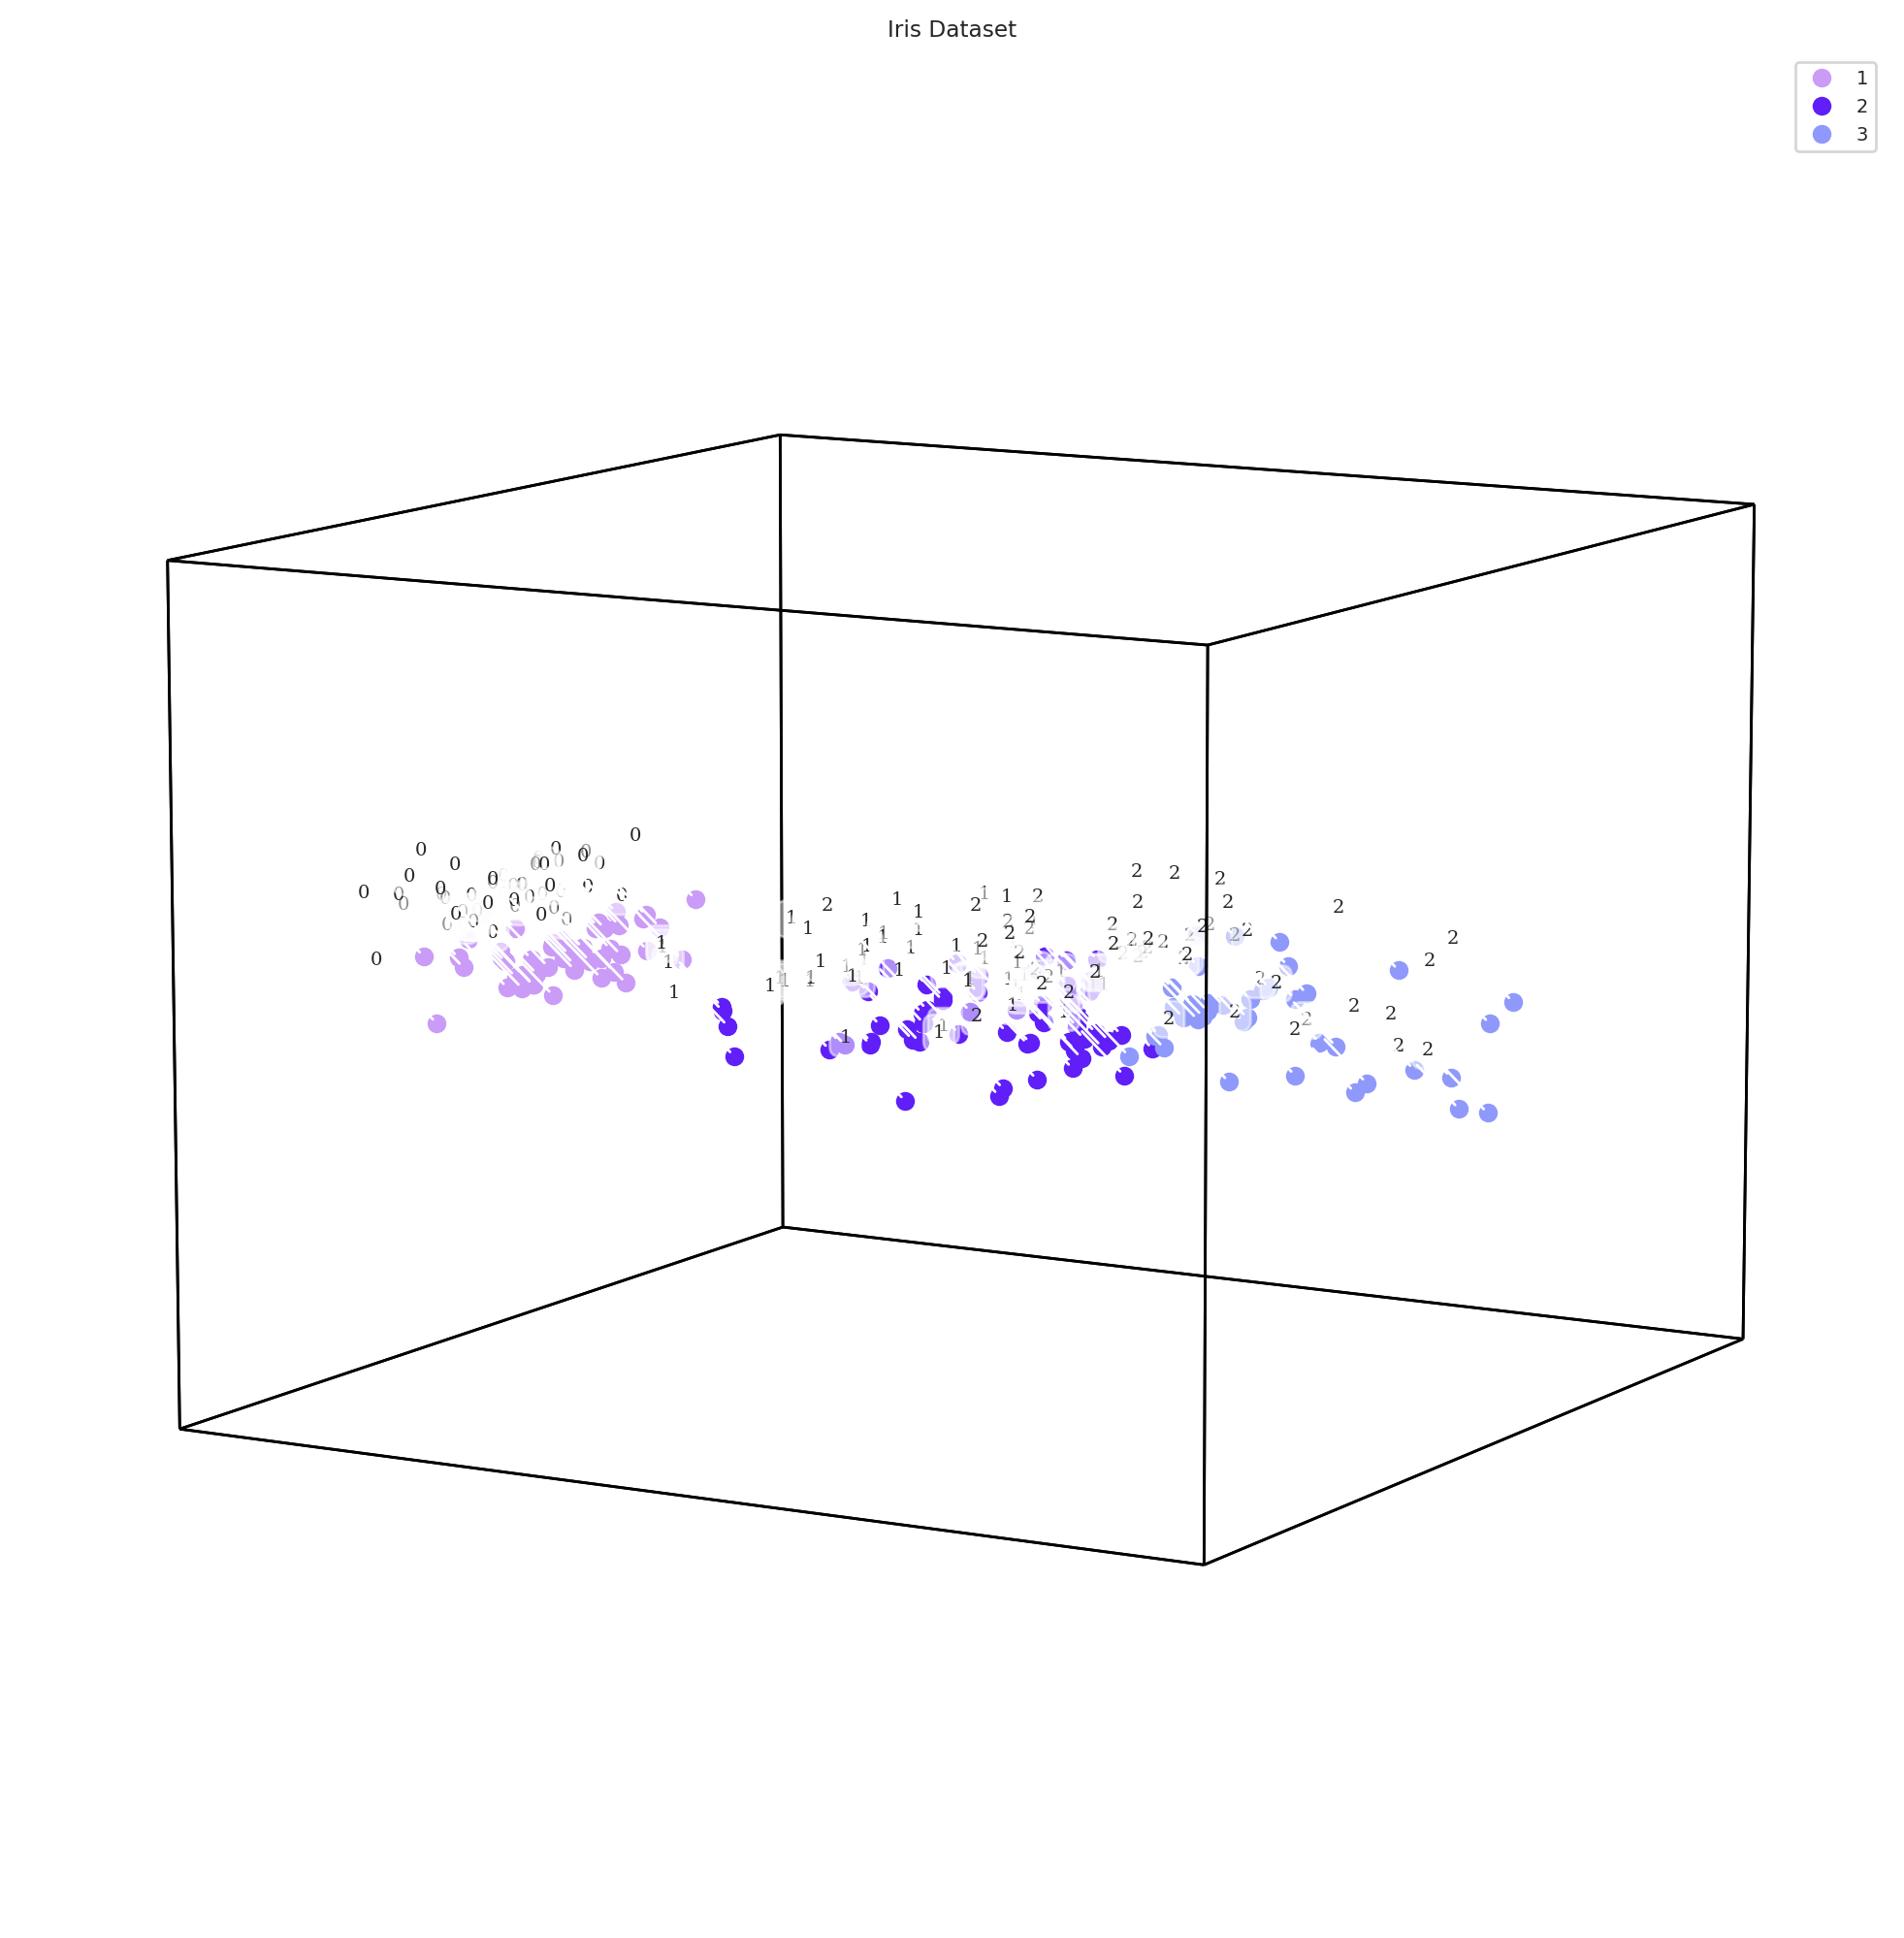

In [ ]:
hyp.plot(title='Iris Dataset',
         x=[X_original_np],
         fmt='o',
         color=[color_iris_setosa_hex, color_iris_versicolor_hex, color_iris_virginica_hex],
         colors=[color_iris_setosa_hex, color_iris_versicolor_hex, color_iris_virginica_hex],
         labels=y_np,
         legend=True,
         n_clusters=3,
         ndims=3,
         align=None)

In [ ]:
#hyp.describe(x=[X_original_np], reduce='PCA', max_dims=2)